In [128]:
from PIL import Image
import sys
import numpy as np 
np.set_printoptions(threshold=sys.maxsize)
import matplotlib.pyplot as plt
import math

In [129]:
image = Image.open("GUC.jpg")

In [130]:
img = np.asarray(image)
img.shape

(250, 500)

In [131]:
def createThresholds(n):
    
    means = np.ones( [ n+1 , 256 ] )
    means= np.negative(means)
    
    return means

In [132]:
def thresholdTheImageFirst(n , image , means):
    
    boundary = 255//n
    means = np.ones( [ n+1 , 256] )
    means= np.negative(means)
    
    for i in range(0,image.shape[0]):
        for j in range(0,image.shape[1]):
            
            x = int(image[i][j])
            if(n == 3):
                
                if( image[i][j] < boundary ):
                     means[0][x] = image[i][j]

                elif( (boundary*2) <= 255 and image[i][j] < (boundary*2) ):
                     means[1][x] = image[i][j]

                elif( (boundary*3) <= 255 and image[i][j] < (boundary*3) ):
                     means[2][x] = image[i][j]

                else:
                     means[3][x] = image[i][j]  
            elif(n == 4):
                
                if( image[i][j] < boundary ):
                     means[0][x] = image[i][j]

                elif( (boundary*2) <= 255 and image[i][j] < (boundary*2) ):
                     means[1][x] = image[i][j]

                elif( (boundary*3) <= 255 and image[i][j] < (boundary*3) ):
                     means[2][x] = image[i][j]
                        
                elif( (boundary*4) <= 255 and image[i][j] < (boundary*4) ):
                     means[3][x] = image[i][j]

                else:
                     means[4][x] = image[i][j]  
                
#     print("thresholdTheImageFirst: ",means)
    
    return means

In [133]:
def thresholdTheImageRest(n , image , means, T):

#     print("thresholdTheImageRest T: ", T)
    
    for i in range(0,image.shape[0]):
        for j in range(0,image.shape[1]):
            
            x = int(image[i][j])
            
            if(n == 3):
                if( image[i][j] < T[0] ):
                    means[0][x] = image[i][j]

                elif( image[i][j] < T[1] ):
                     means[1][x] = image[i][j]

                elif( image[i][j] < T[2] ):
                     means[2][x] = image[i][j]
                else:
                     means[3][x] = image[i][j]
                        
            elif(n == 4):
                if( image[i][j] < T[0] ):
                    means[0][x] = image[i][j]

                elif( image[i][j] < T[1] ):
                     means[1][x] = image[i][j]

                elif(  image[i][j] < T[2] ):
                     means[2][x] = image[i][j]
                        
                elif(  image[i][j] < T[3] ):
                     means[3][x] = image[i][j]
                else:
                     means[4][x] = image[i][j]
                        
                    
    return means

In [142]:
def calculateTheThreshold(n,means,img):

    T = np.zeros( [ n , 1 ] )
    
#     print(means.shape[0]-1)

    for k in range(0,means.shape[0]-1):
#         print(k)
#         print(means[k][means>0])
        y = np.array(means[k])
        z = np.array(means[k+1])
        y = y[y>=0]
        z = z[z>=0]
        T[k] = (np.mean(y) + np.mean(z) )// 2
    
    
#         print("y ",y)
#         print("z ",z)

    return T


In [140]:
def mainFunction(n,image):
    
    
    
    T_Past = np.zeros( [ n , 1 ] )
    T = np.ones( [ n , 1 ] )
    
    i = 0
    
    while(  not (np.array_equal(T_Past , T)) ):
        
        means = createThresholds(n) 
        
        T_Past = T.copy()
        
        if(i == 0):
            means = thresholdTheImageFirst(n, image,means)
            
        else:
            means = thresholdTheImageRest(n, image , means , T)

        T = calculateTheThreshold(n,means,image)
        

        
        i+=1
        
    return T




In [157]:
n = eval(input()) #Recommended to enter 3 or 4 

T = mainFunction(n,img)

3


In [143]:
def binaryImage(image,x):
    newImg = np.zeros([image.shape[0],image.shape[1]])
    for i in range(0,image.shape[0]):
        for j in range(0,image.shape[1]): 
            if(image[i][j] < x):
                newImg[i][j] = 0
            else:
                newImg[i][j] = 1
                
    return newImg

In [154]:
def segmentedImage(n,image,T):
    newImg = np.zeros([image.shape[0],image.shape[1]])
    
    for i in range(0,image.shape[0]):
        for j in range(0,image.shape[1]): 
            if(n == 4):
                if(image[i][j] < T[0]):
                    newImg[i][j] = 0
                elif(image[i][j] < T[1]):
                    newImg[i][j] = 255//4
                elif(image[i][j] < T[2]):
                    newImg[i][j] = 255//3
                elif(image[i][j] < T[3]):
                    newImg[i][j] = 255//2
                else:
                    newImg[i][j] = 255
                    
            if(n == 3):
                if(image[i][j] < T[0]):
                    newImg[i][j] = 0
                elif(image[i][j] < T[1]):
                    newImg[i][j] = 255//3
                elif(image[i][j] < T[2]):
                    newImg[i][j] = 255//2
                else:
                    newImg[i][j] = 255
                    
                
    return newImg    

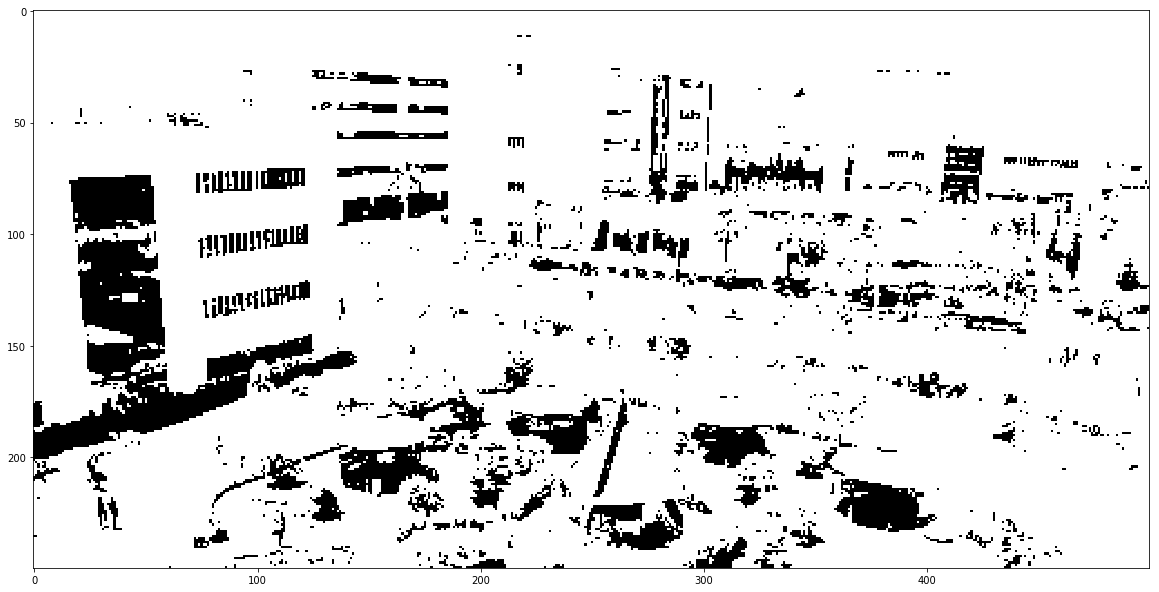

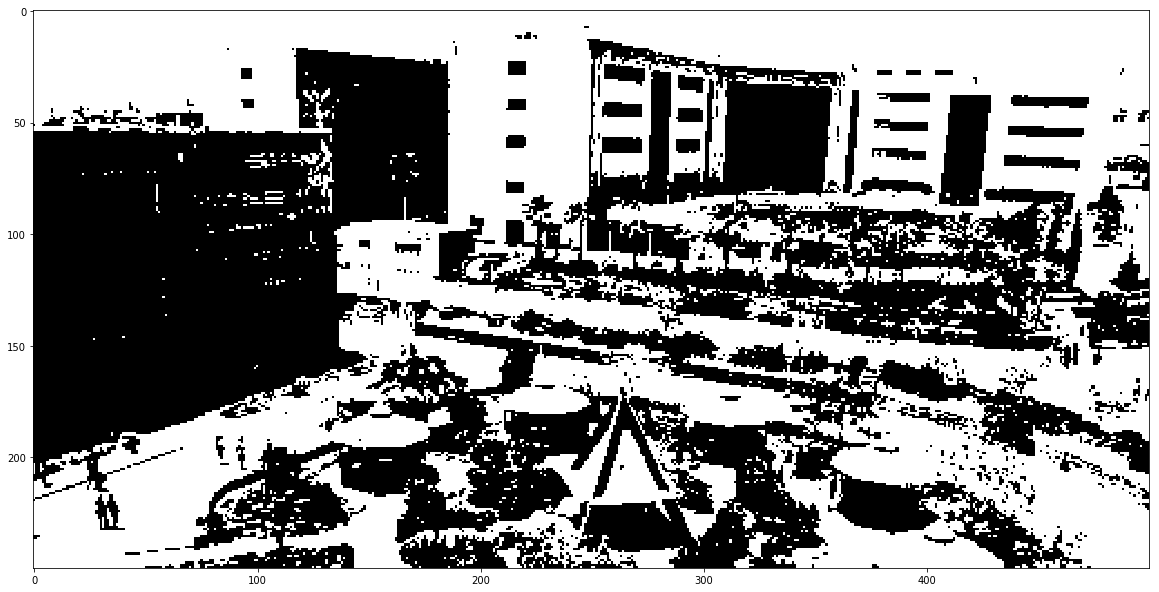

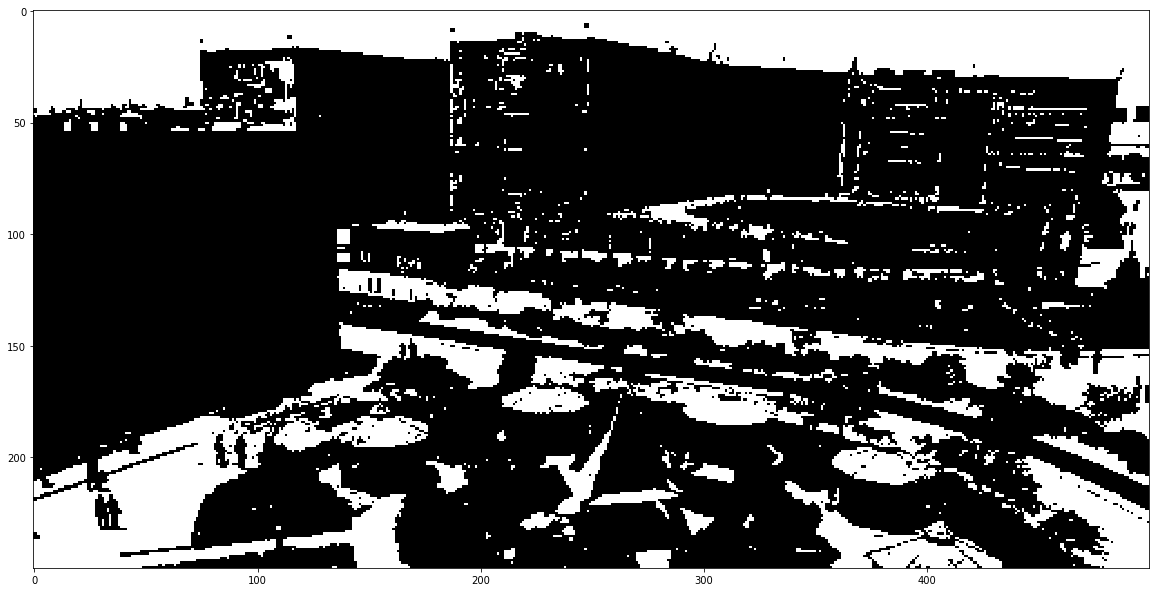

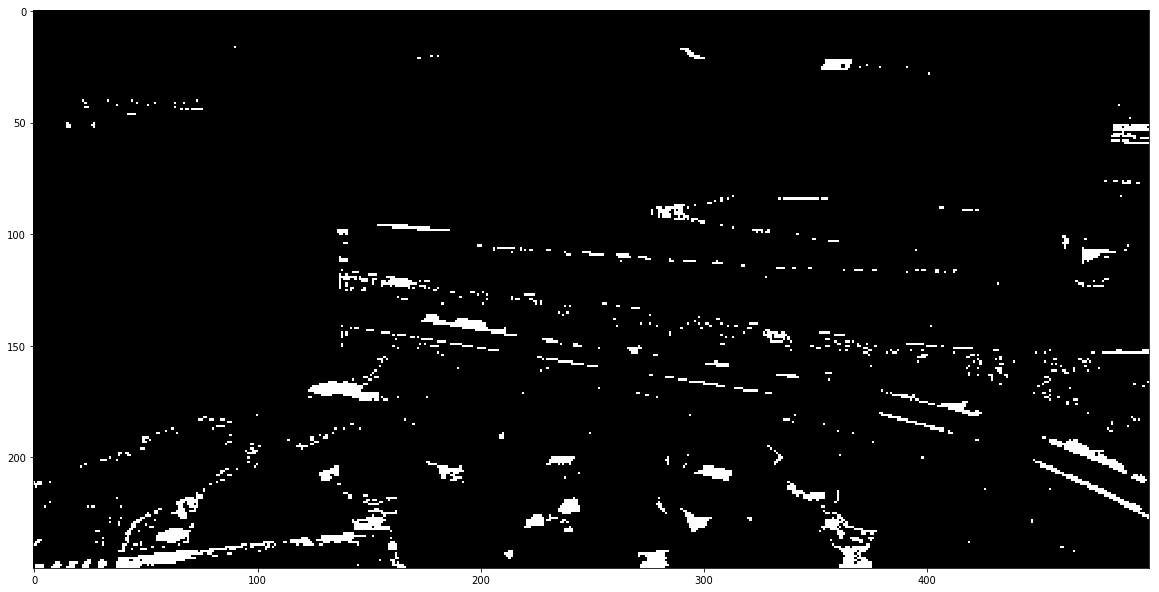

In [152]:
for f in range(0,T.shape[0]):
    plt.figure(figsize=(20,20)) 
    plt.imshow( binaryImage(img,T[f]) , cmap="gray" )
    plt.savefig("GUC_"+ str(n)+"_" +str(T[f]) +".jpg")
    

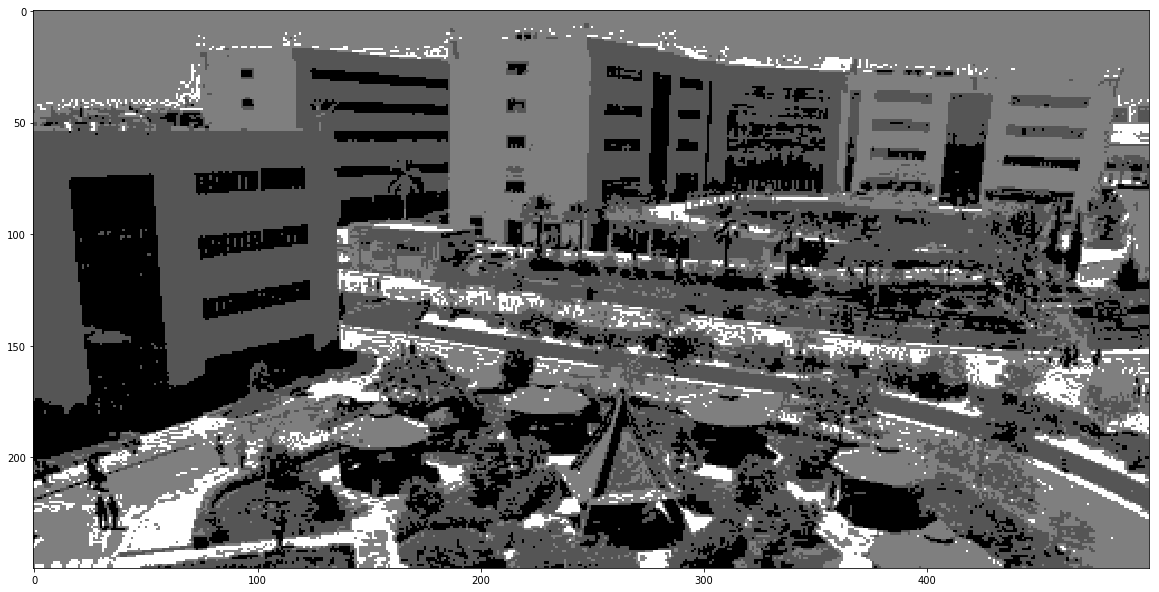

In [158]:
plt.figure(figsize=(20,20)) 
plt.imshow( segmentedImage(n,img,T) , cmap="gray" )
plt.savefig("GUC_"+ str(n)+".jpg")
